In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
image_size = (128, 128)
batch_size = 32

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory('Training/', 
                                                        image_size=image_size,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        shuffle=True,
                                                        seed=10)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [4]:
val_data = tf.keras.utils.image_dataset_from_directory('Training/',
                                                      image_size=image_size,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      shuffle=True,
                                                      seed=10)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [5]:
class_names = train_data.class_names

In [6]:
class_size = 4

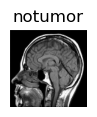

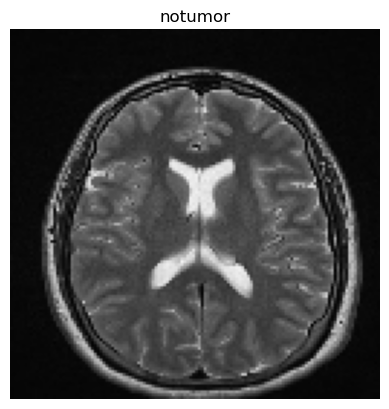

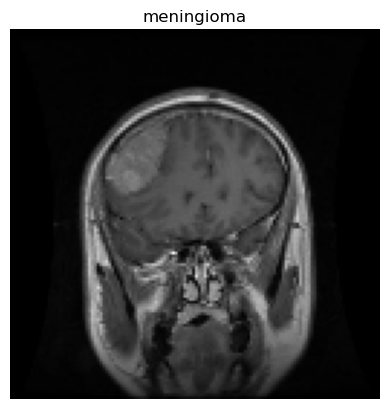

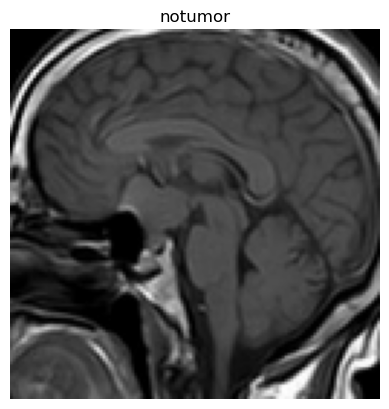

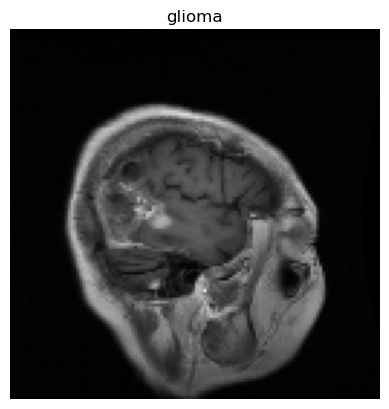

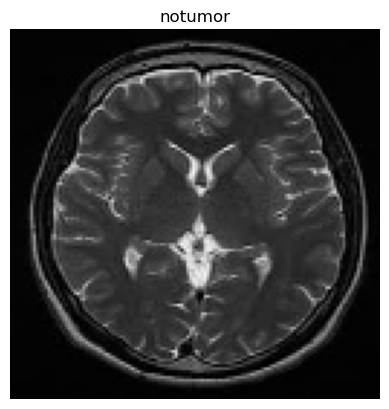

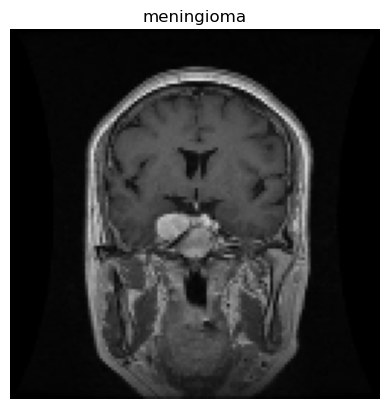

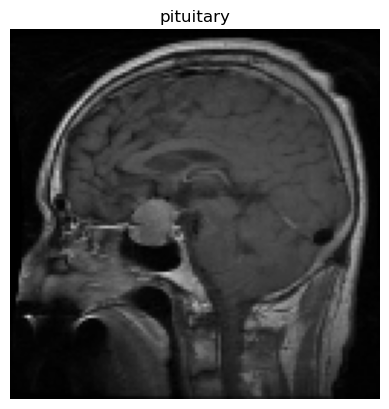

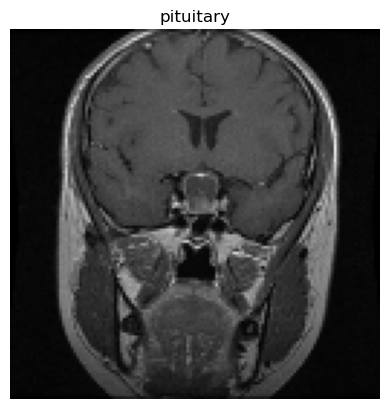

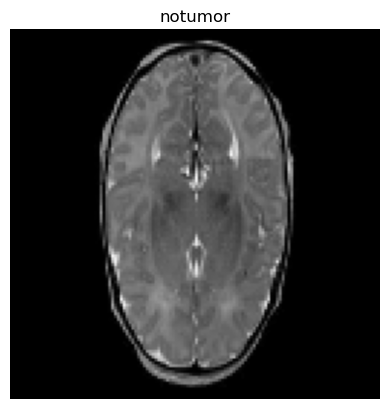

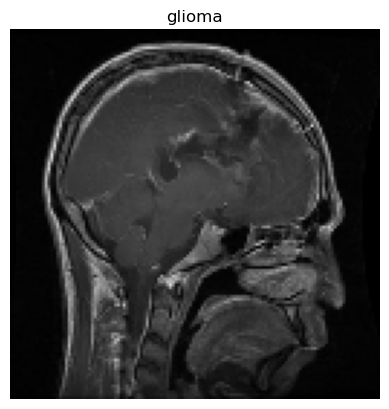

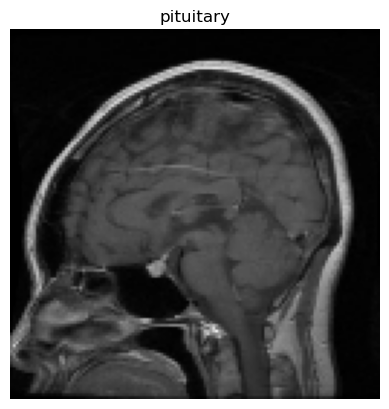

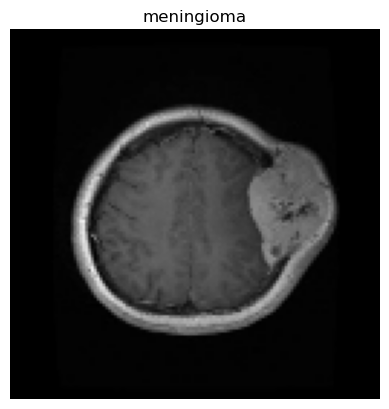

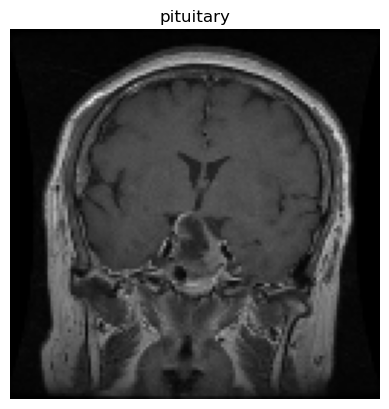

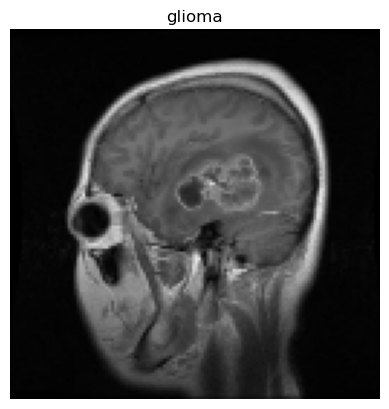

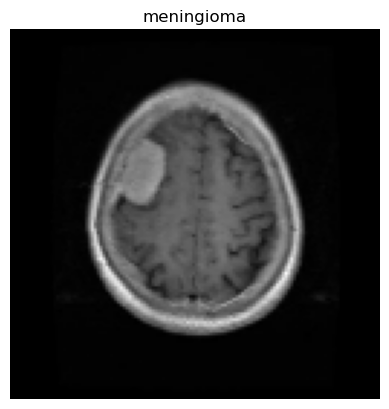

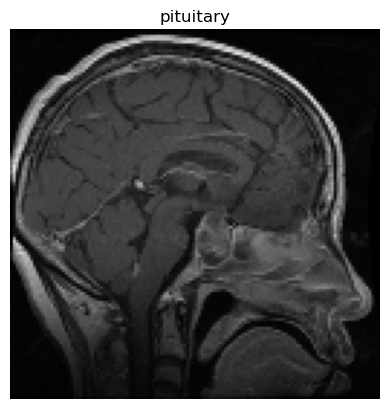

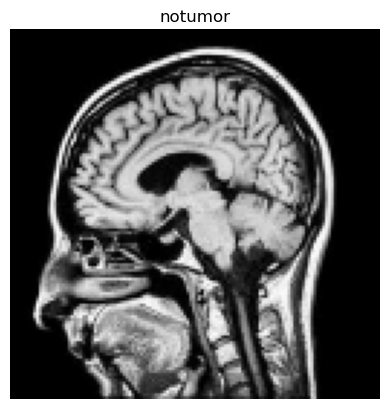

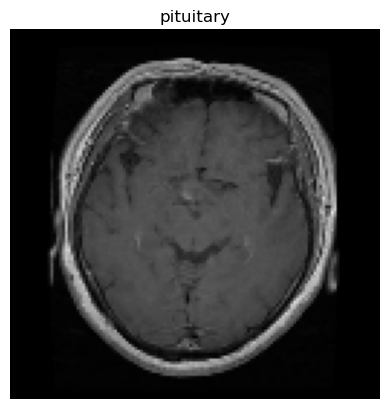

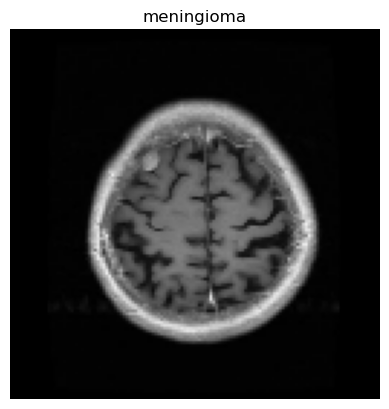

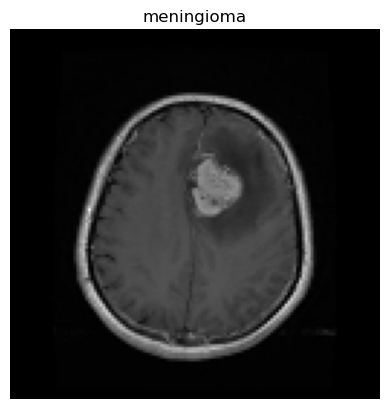

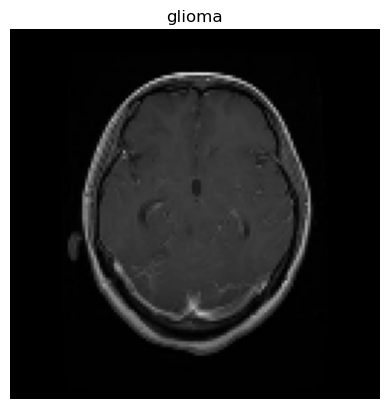

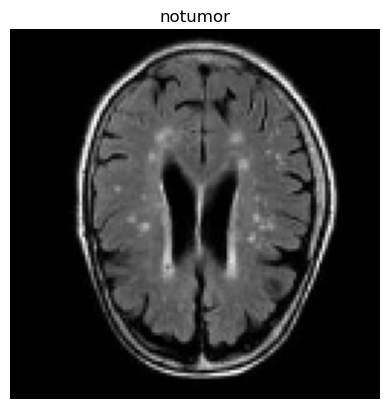

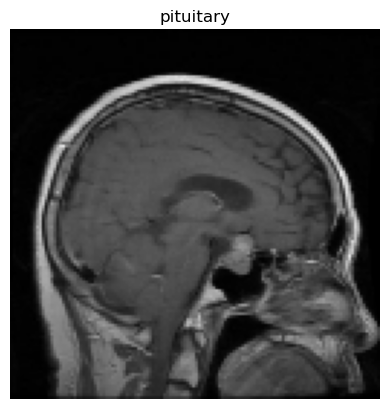

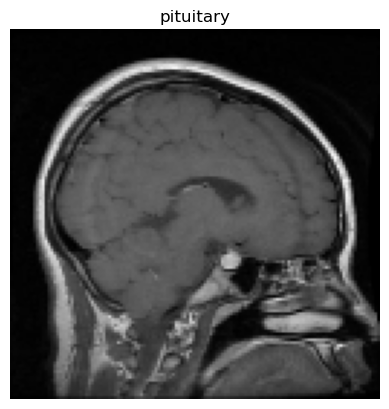

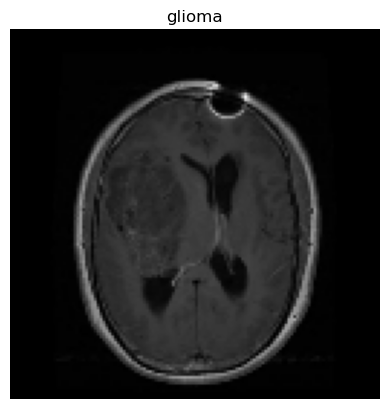

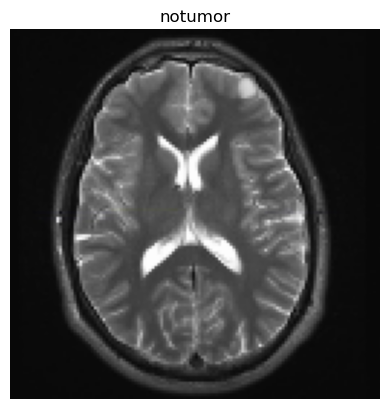

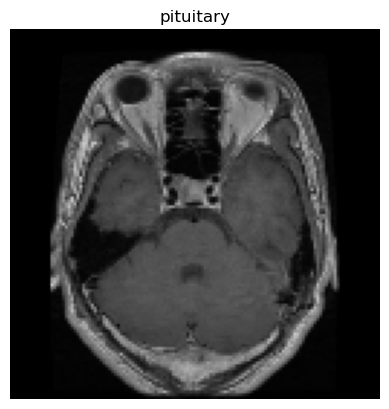

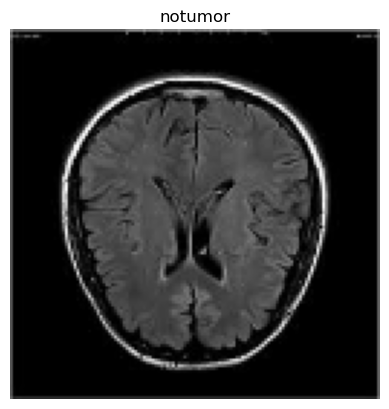

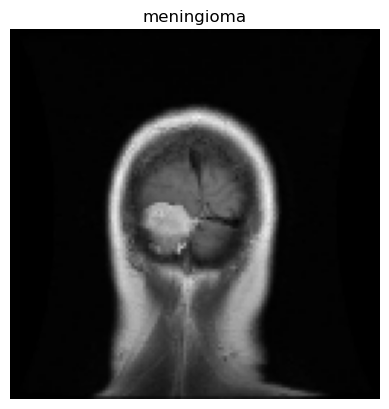

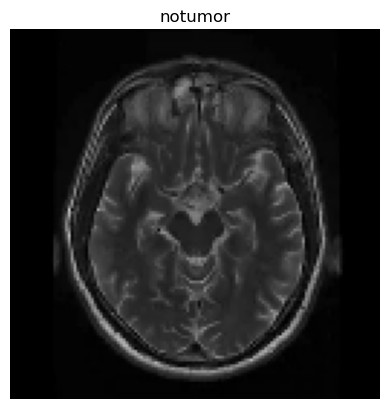

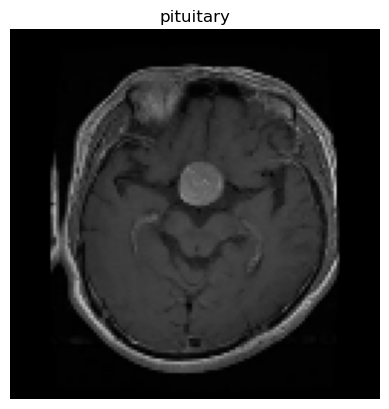

In [7]:
plt.figure(figsize=(32, 1))
for images, labels in train_data.take(1):
    for i in range(len(images)):
        # plt.subplot(32,1,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        plt.show()

In [ ]:
tf.keras.Sequential([

])

In [37]:
cnn = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(class_size, activation='softmax')
])

In [38]:
cnn.compile(optimizer = 'adam',   
            loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
            metrics = ['accuracy'])

In [39]:
history = cnn.fit(train_data,
       validation_data=val_data,
       epochs=30)

Epoch 1/30
143/143 [==============================] - 26s 172ms/step - loss: 0.6959 - accuracy: 0.7254 - val_loss: 0.4884 - val_accuracy: 0.8074
Epoch 2/30
143/143 [==============================] - 26s 178ms/step - loss: 0.3539 - accuracy: 0.8716 - val_loss: 0.3230 - val_accuracy: 0.8783
Epoch 3/30
143/143 [==============================] - 27s 185ms/step - loss: 0.2306 - accuracy: 0.9186 - val_loss: 0.3316 - val_accuracy: 0.8792
Epoch 4/30
143/143 [==============================] - 27s 188ms/step - loss: 0.1596 - accuracy: 0.9438 - val_loss: 0.2757 - val_accuracy: 0.8993
Epoch 5/30
143/143 [==============================] - 27s 189ms/step - loss: 0.0864 - accuracy: 0.9720 - val_loss: 0.2600 - val_accuracy: 0.9264
Epoch 6/30
143/143 [==============================] - 27s 189ms/step - loss: 0.0556 - accuracy: 0.9818 - val_loss: 0.2872 - val_accuracy: 0.9247
Epoch 7/30
143/143 [==============================] - 27s 188ms/step - loss: 0.0516 - accuracy: 0.9818 - val_loss: 0.3350 - val_ac

In [13]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

In [14]:
cnn.save('./saved_models/model_1.keras')

In [3]:
cnn2 = tf.keras.models.load_model('./saved_models/model_1.keras')

In [8]:
test_data = tf.keras.utils.image_dataset_from_directory('Testing/',
                                                       image_size=image_size,
                                                       batch_size=32,
                                                       shuffle=False,
                                                       seed=10)

Found 1311 files belonging to 4 classes.


In [41]:
predicted_data = cnn.predict(test_data)

41/41 [==============================] - 2s 44ms/step


In [20]:
predicted_data.shape

(1311, 4)

In [42]:
y_pred = tf.argmax(predicted_data, axis=1).numpy()

In [23]:
y_pred

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [43]:
y_true = []
for images, labels in test_data:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

In [25]:
y_true

array([0, 0, 0, ..., 3, 3, 3])

In [44]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      glioma       0.96      0.93      0.94       300
  meningioma       0.92      0.89      0.91       306
     notumor       0.96      0.99      0.98       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [53]:
from sklearn.metrics import confusion_matrix

In [62]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[279,  19,   1,   1],
       [ 12, 273,  15,   6],
       [  1,   3, 401,   0],
       [  0,   2,   0, 298]], dtype=int64)

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

In [56]:
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)

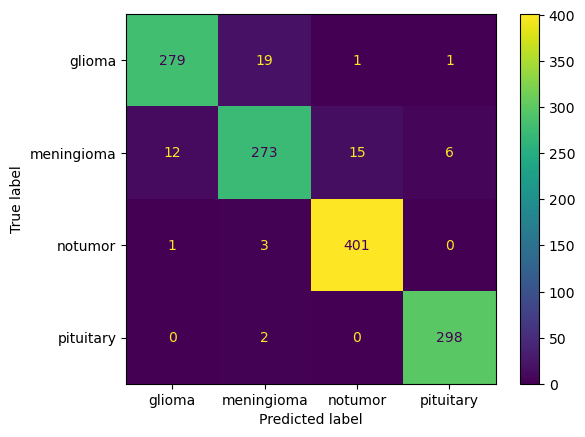

In [57]:
cmd.plot()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_true, y_pred)

0.954233409610984

In [1]:
cnn = tf.keras.models.load_model('saved_models/model_1.keras')

NameError: name 'tf' is not defined

In [3]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

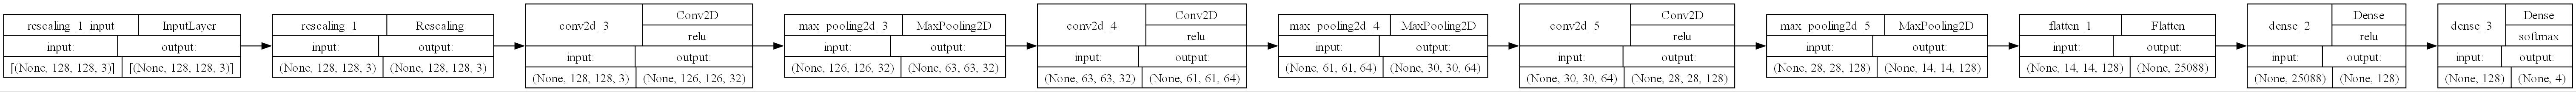

In [8]:
tf.keras.utils.plot_model(cnn, to_file='model visualization/model1.jpg', dpi=150,show_shapes=True,rankdir='LR', show_layer_activations=True, show_layer_names=True)

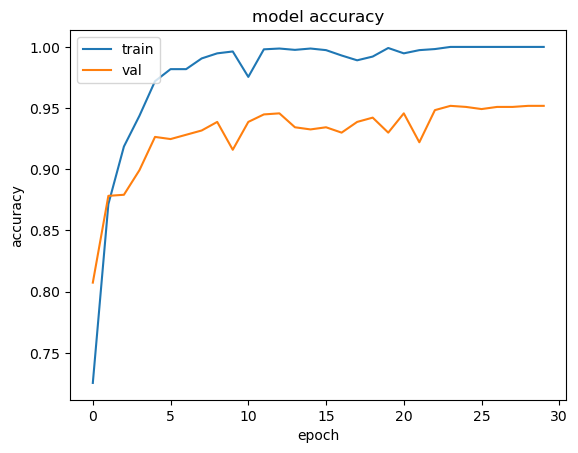

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

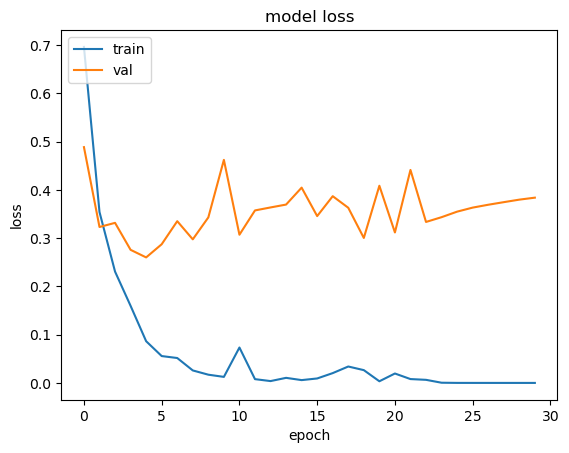

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()